In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [ ]:
print('y_train shape:', y_train.shape)

y_train shape: (50000, 1)


In [ ]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

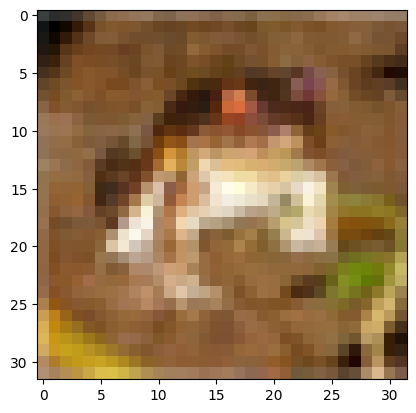

In [ ]:
img = plt.imshow(x_train[0])

In [ ]:
print('The label is:', y_train[0])

The label is: [6]


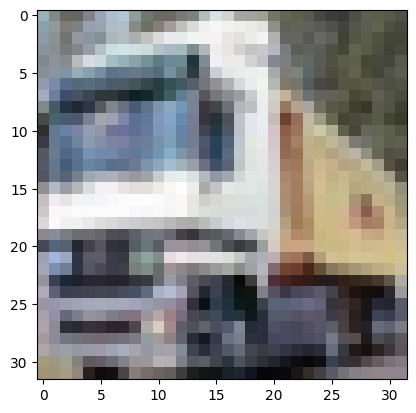

In [ ]:
img = plt.imshow(x_train[1])

In [ ]:
print('The label is:', y_train[1])

The label is: [9]


In [ ]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [ ]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same',
input_shape=(32,32,3)))

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Dropout(0.25))

In [ ]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(512, activation='relu'))

In [ ]:
model.add(Dropout(0.5))

In [ ]:
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

In [ ]:
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train_one_hot,
batch_size=32, epochs=20,
validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 184s 146ms/step - loss: 1.5744 - accuracy: 0.4238 - val_loss: 1.2478 - val_accuracy: 0.5545
Epoch 2/20
1250/1250 [==============================] - 173s 139ms/step - loss: 1.2022 - accuracy: 0.5726 - val_loss: 1.0545 - val_accuracy: 0.6199
Epoch 3/20
1250/1250 [==============================] - 179s 143ms/step - loss: 1.0495 - accuracy: 0.6281 - val_loss: 0.9473 - val_accuracy: 0.6667
Epoch 4/20
1250/1250 [==============================] - 189s 151ms/step - loss: 0.9557 - accuracy: 0.6645 - val_loss: 0.8801 - val_accuracy: 0.6902
Epoch 5/20
1250/1250 [==============================] - 197s 158ms/step - loss: 0.8925 - accuracy: 0.6854 - val_loss: 0.8351 - val_accuracy: 0.7109
Epoch 6/20
1250/1250 [==============================] - 174s 139ms/step - loss: 0.8314 - accuracy: 0.7035 - val_loss: 0.8654 - val_accuracy: 0.7005
Epoch 7/20
1250/1250 [==============================] - 172s 138ms/step - loss: 0.7786 - accuracy: 0.7246 - val_

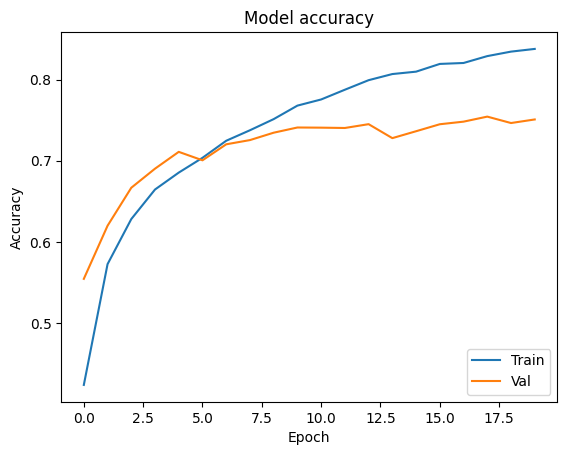

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

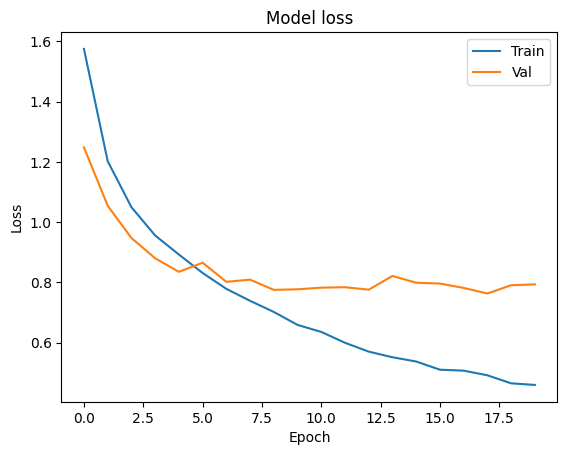

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 12s 37ms/step - loss: 0.7970 - accuracy: 0.7464


0.746399998664856

In [ ]:
model.save('my_cifar10_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

uploads = files.upload()

Saving cat.jpg to cat.jpg
Saving cat2.jpg to cat2.jpg


In [ ]:
my_image = plt.imread("cat.jpg")

In [ ]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

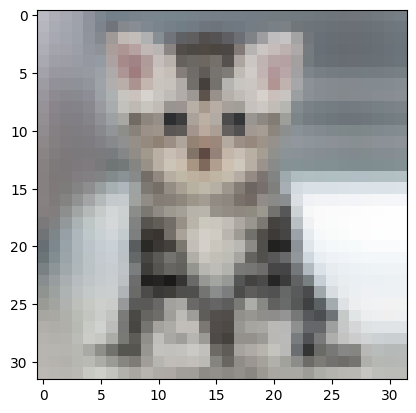

In [ ]:
img = plt.imshow(my_image_resized)

In [ ]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

1/1 [==============================] - 0s 23ms/step


In [ ]:
probabilities

array([[8.2429675e-03, 2.9827530e-05, 5.1417448e-02, 1.5757133e-01,
        4.1341862e-01, 2.1541297e-01, 5.5794101e-02, 9.7103342e-02,
        7.9841609e-04, 2.1099021e-04]], dtype=float32)

In [ ]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: deer -- Probability: 0.41341862
Second most likely class: dog -- Probability: 0.21541297
Third most likely class: cat -- Probability: 0.15757133
Fourth most likely class: horse -- Probability: 0.09710334
Fifth most likely class: frog -- Probability: 0.0557941


In [ ]:
my_image2 = plt.imread("cat2.jpg")

In [ ]:
from skimage.transform import resize
my_image2_resized = resize(my_image2, (32,32,3))

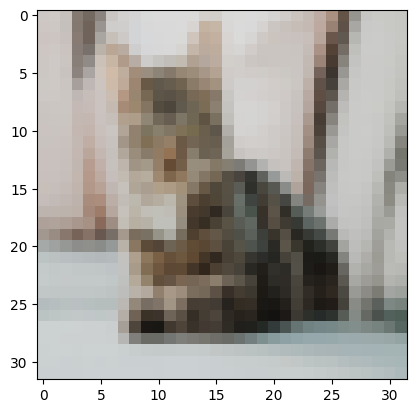

In [ ]:
img = plt.imshow(my_image2_resized)

In [ ]:
import numpy as np
probabilities2 = model.predict(np.array( [my_image2_resized,] ))

1/1 [==============================] - 0s 41ms/step


In [ ]:
probabilities2

array([[1.8433064e-02, 2.2102332e-04, 4.6414156e-03, 9.5463777e-01,
        3.3671816e-03, 5.0395783e-03, 2.3144740e-03, 5.4690859e-04,
        1.1085345e-03, 9.6901469e-03]], dtype=float32)

In [ ]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities2[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities2[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities2[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities2[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities2[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities2[0,index[5]])

Most likely class: cat -- Probability: 0.95463777
Second most likely class: airplane -- Probability: 0.018433064
Third most likely class: truck -- Probability: 0.009690147
Fourth most likely class: dog -- Probability: 0.0050395783
Fifth most likely class: bird -- Probability: 0.0046414156
